In [ ]:
import sklearn
import scipy
import scipy.stats as stats
from scipy.stats import skew,boxcox_normmax, zscore
from scipy.special import boxcox1p
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,RobustScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error 
from sklearn.model_selection import KFold, RandomizedSearchCV
from mlxtend.regressor import StackingCVRegressor
from multiprocessing import cpu_count
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv("train.csv")
test_data =  pd.read_csv("test to participants.csv")

In [ ]:
train_data["placed"] = train_data["placed"].replace(["Yes","No"],[1,0])
test_data["placed"] = test_data["placed"].replace(["Yes","No"],[1,0])

In [ ]:
test = test_data.drop("ID",axis = 1)
test = test_data.drop("placed",axis = 1)
train = train_data.drop("placed",axis=1)

In [ ]:
test['index']  = [(96459 + i) for i in range(1,24116)]

In [ ]:
test.set_index("index",inplace = True)

In [ ]:
train.tail()

,Gender,TypeofDisability,castecategory,Religion,JobRole,SectorName,PartnerName,TC State,TC District,TC Name,TotalCandidatesinBatch,Result,Assesment status,Grade,Certified,Certificate GenerateDate,Unnamed: 16,agegroup,EducationLevel,District,No. of colleges,Trade Count,No of ITI,Ph.D,M.Phil,Post Graduate,Under Graduate,PG Diploma,Diploma,Certificate,Integrated,Total Number of Schools,Total Poulation,Sexratio,Decadal Growth Rate,Overall Literacy,Female Literacy,Primary Enrollment,Primary with Upper Primary Enrollment,Primary with Upper Primary sec/higher sec. Enrollment,...,"Manufacturing (Metals & Chemicals, and products thereof)",Manufacturing (Leather & products thereof),Mining & Quarrying,Manufacturing (Wood Products),Insurance,"Manufacturing (Paper & Paper products, Publishing, PRIVnting and reproduction of recorded media)",Total population,Population Age(15-21),Population (15-24) Absolute,Population (5-14) Absolute,Population Total male,Population Total female,Population Hindu,Population Muslim,Population christian,Population Sikh,Population Jain,Population other,Total Households,Total Rural Household,Total Urban Household,Number Normal Rural,Number Normal Urban,Institutional Rural,Institutional Urban,Houseless Rural,Houseless Urban,Houseless with Shelter Urban,Houseless without Shelter Urban,Total Population,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher,Not In Labour Force,Employed,Unemployed
96455,Male,None,OBC,NaN,Unarmed Security Guard,Management,IL & FS Skills Development Corporation Limited,Rajasthan,Sikar,PMKK Sikar,30,Fail,1,NaN,No,NaN,NaN,14-18,10th std & below,Sikar,231,272,150,61,0,12856,112901,99,7726,487,1522,4409,2677737,944,17.04,72.98,58.76,63222,213429,163554,...,185,24,149,0,0,0,2677333,439073,586143,620359,1374990,1302343,2342076,327583,1122,356,4050,15,460555,369270,91285,368361,90724,399,123,489,433,388,45,2827368,967497,284579,339900,300801,225562,163591,133180,22.957682,9.344477,1.490294
96456,Female,None,Gen,Hinduism,Customer Care Executive - (Telecom Call Centre),Telecom,NIFA Infocomp Services Pvt Limited,Rajasthan,Dungarpur,Pmkk Dungarpur,30,Pass,1,NaN,Yes,41:05.9,NaN,19-21,11th-12th std,Dungarpur,26,32,8,0,0,830,19886,8,746,0,178,2874,1388906,990,25.39,60.78,46.98,107975,119491,37534,...,22,0,88,0,0,0,1388552,192922,254131,352294,696532,692020,1340065,28662,830,240,16141,853,316053,298430,17623,296465,17472,435,87,1527,61,54,7,1440403,764563,228220,162289,102704,51198,35589,28732,7.619614,6.458843,0.036286
96457,Female,None,SC,NaN,Assistant Beauty Therapist,Beauty and Wellness,Orion Edutech Private Limited,Haryana,Bhiwani,Orion Edutech Bhiwani,30,Pass,1,NaN,Yes,49:21.8,NaN,31-35,11th-12th std,Bhiwani,59,171,47,0,0,3175,36305,138,2062,0,84,1691,1629109,884,14.32,76.74,64.80,96152,14971,101076,...,302,0,66,0,0,0,1634445,246687,340301,334649,866672,767773,1611031,15515,873,2401,1016,26,299865,244308,55557,243583,55097,586,298,137,162,153,9,1553152,459364,154825,185281,164552,178782,120600,66816,8.574915,4.233265,0.356047
96458,Male,None,OBC,Hinduism,Mobile Phone Hardware Repair Technician,Electronics and Hardware,THE MANAV KALYAN AVAM VIKAS SANSTHA,Jharkhand,Palamu,LAL BAHADUR SHASTRI TRAINING CENTER-DALTONGANJ,25,Pass,1,NaN,Yes,55:38.2,NaN,22-25,10th std & below,Palamu,19,58,19,0,0,4559,31546,0,0,0,0,2859,1936319,929,25.94,65.50,53.87,121001,314159,39999,...,15,0,10,0,0,0,1939869,257383,343719,535410,1006302,933567,1683169,238295,6164,734,284,5681,349805,325420,24385,324357,23987,954,188,108,210,76,134,1966964,803424,280649,273978,211695,144252,87987,48457,9.894798,3.416538,0.396084
96459,Male,Non

In [ ]:
test = test.drop("ID",axis = 1)

In [ ]:
test.head()

,Gender,TypeofDisability,castecategory,Religion,JobRole,SectorName,PartnerName,TC State,TC District,TC Name,TotalCandidatesinBatch,Result,Assesment status,Grade,Certified,Certificate GenerateDate,Unnamed: 16,agegroup,EducationLevel,District,No. of colleges,Trade Count,No of ITI,Ph.D,M.Phil,Post Graduate,Under Graduate,PG Diploma,Diploma,Certificate,Integrated,Total Number of Schools,Total Poulation,Sexratio,Decadal Growth Rate,Overall Literacy,Female Literacy,Primary Enrollment,Primary with Upper Primary Enrollment,Primary with Upper Primary sec/higher sec. Enrollment,...,"Manufacturing (Metals & Chemicals, and products thereof)",Manufacturing (Leather & products thereof),Mining & Quarrying,Manufacturing (Wood Products),Insurance,"Manufacturing (Paper & Paper products, Publishing, PRIVnting and reproduction of recorded media)",Total population,Population Age(15-21),Population (15-24) Absolute,Population (5-14) Absolute,Population Total male,Population Total female,Population Hindu,Population Muslim,Population christian,Population Sikh,Population Jain,Population other,Total Households,Total Rural Household,Total Urban Household,Number Normal Rural,Number Normal Urban,Institutional Rural,Institutional Urban,Houseless Rural,Houseless Urban,Houseless with Shelter Urban,Houseless without Shelter Urban,Total Population,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher,Not In Labour Force,Employed,Unemployed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96460,Male,None,Gen,Others,Domestic Data entry Operator,IT-ITeS,ICA EDU SKILLS PVT LTD,West Bengal,Nadia,ICA - Krishnanagar,30,Pass,1,Grade D,Yes,08:37.5,NaN,22-25,11th-12th std,Nadia,54,114,19,1130,97,27607,163784,1069,9441,313,548,4471,5168488,947,12.24,75.58,71.35,397585,1355,3385,...,199,0,0,0,0,0,5167600,720646,1011277,910898,2653768,2513832,3728482,1382682,33835,849,281,16893,1236126,1036142,199984,1034582,199231,1442,352,118,401,256,145,5205581,1570127,531520,922154,854159,314707,168159,127514,26.328569,20.842759,0.814512
96461,Male,None,OBC,Hinduism,Field Technician - Other Home Appliances,Electronics and Hardware,NEW ARAWALI SHIKSHA SAMITI,Rajasthan,Alwar,GOURAV SHIKSHA SAMITI,30,Pass,1,Grade B,Yes,04:44.2,NaN,22-25,10th std & below,Alwar,201,315,125,10,0,7669,94255,60,4684,728,666,5502,3671999,894,22.70,71.68,56.78,113707,351895,205913,...,2189,31,488,41,0,0,3674179,558739,757605,889660,1939026,1735153,3039279,547335,2696,64532,13221,348,632451,529224,103227,527733,102697,704,225,786,305,140,165,3647772,1384905,436897,425308,398494,258384,180145,141335,24.536163,9.894030,0.928954
96462,Female,None,Gen,Hinduism,Trainee Associate,Retail,Centum WorkSkills India Limited,Madhya Pradesh,Indore,PMKK_Indore,30,Pass,1,NaN,Yes,15:10.5,NaN,22-25,10th std & below,Indore,300,105,28,1403,28,34322,172433,3437,7954,170,4916,3477,3272335,924,32.71,82.32,74.89,155421,349596,52833,...,6102,51,570,32,23,0,3276697,454100,641762,637642,1699627,1577070,2728225,415142,18523,25696,71667,720,607780,181140,426640,179747,422854,1186,3039,180,377,318,59,3084814,718174,147863,142092,107748,89939,60960,40130,14.785168,8.834991,0.522607
96463,Female,None,Gen,Hinduism,Field Technician - Computing and Peripherals,Electronics and Hardware,NAIFA COMPUTER EDUCATIONAL SANSTHAN,Madhya Pradesh,Indore,NAIFA COMPUTER EDUCATIONAL SANSTHAN,30,Pass,1,Grade B,Yes,02:00.0,NaN,26-30,11th-12th std,Indore,300,105,28,1403,28,34322,172433,3437,7954,170,4916,3477,3272335,924,32.71,82.32,74.89,155421,349596,52833,...,6102,51,570,32,23,0,3276697,454100,641762,637642,1699627,1577070,2728225,4

In [ ]:
data = pd.concat([train,test])

In [ ]:
data.tail()

,Gender,TypeofDisability,castecategory,Religion,JobRole,SectorName,PartnerName,TC State,TC District,TC Name,TotalCandidatesinBatch,Result,Assesment status,Grade,Certified,Certificate GenerateDate,Unnamed: 16,agegroup,EducationLevel,District,No. of colleges,Trade Count,No of ITI,Ph.D,M.Phil,Post Graduate,Under Graduate,PG Diploma,Diploma,Certificate,Integrated,Total Number of Schools,Total Poulation,Sexratio,Decadal Growth Rate,Overall Literacy,Female Literacy,Primary Enrollment,Primary with Upper Primary Enrollment,Primary with Upper Primary sec/higher sec. Enrollment,...,"Manufacturing (Metals & Chemicals, and products thereof)",Manufacturing (Leather & products thereof),Mining & Quarrying,Manufacturing (Wood Products),Insurance,"Manufacturing (Paper & Paper products, Publishing, PRIVnting and reproduction of recorded media)",Total population,Population Age(15-21),Population (15-24) Absolute,Population (5-14) Absolute,Population Total male,Population Total female,Population Hindu,Population Muslim,Population christian,Population Sikh,Population Jain,Population other,Total Households,Total Rural Household,Total Urban Household,Number Normal Rural,Number Normal Urban,Institutional Rural,Institutional Urban,Houseless Rural,Houseless Urban,Houseless with Shelter Urban,Houseless without Shelter Urban,Total Population,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher,Not In Labour Force,Employed,Unemployed
120570,Female,None,Gen,NaN,Self Employed Tailor,Apparel,Aaruthal Foundation,Tamil Nadu,Karur,PMKK KARUR,30,Not Appeared,0,NaN,No,NaN,NaN,36-40,11th-12th std,Karur,31,21,7,144,125,2745,24443,0,3683,0,0,1005,1076588,1015,15.06,75.86,67.05,42418,32225,33449,...,97,0,23,0,0,0,1064493,119602,169450,166179,528184,536309,993666,53292,16483,115,7,79,275965,176084,99881,175455,99643,607,211,22,27,21,6,1036340,276930,48715,125738,104427,85576,44102,40232,3.547615,2.584813,0.187259
120571,Male,None,Gen,Islam,Goods & Services Tax (GST) Accounts Assistant,BFSI,DORIC MULTIMEDIA PVT. LTD.,Punjab,Rupnagar,G.I.V.E.S,30,Pass,1,NaN,Yes,13:39.0,NaN,26-30,Under Graduate/Graduate,Rupnagar,23,55,8,380,0,1476,13567,167,1466,46,2,1098,683349,913,8.67,83.28,77.17,32705,2500,23510,...,4,0,0,0,0,0,684627,97986,137294,118523,357485,327142,304481,14492,2094,361045,653,143,123887,94482,29405,94343,29385,130,20,9,0,0,0,616796,124100,42212,89556,79536,91465,49661,19273,3.001527,1.711048,0.565489
120572,Male,None,Gen,Hinduism,F & B Service: Steward,Tourism & Hospitality,Amro Tourism Academy,Maharashtra,Nashik,AMRO TOURISM ACADEMY,30,Pass,1,NaN,Yes,53:50.7,NaN,26-30,11th-12th std,Nashik,229,327,51,282,22,23654,230146,124,30080,1382,874,5157,6109052,931,22.33,80.96,73.43,256041,329412,64122,...,4000,42,84,40,142,0,6107187,854049,1206528,1229885,3157186,2950001,5237009,693052,23946,8912,38212,1795,1134194,702961,431233,700828,430059,1024,959,1106,213,173,40,5702263,1481778,396350,697132,492501,475624,261919,124511,29.769311,18.647359,0.439637
120573,Female,None,SC,Hinduism,Field Technician - Computing and Peripherals,Electronics and Hardware,THE MANAV KALYAN AVAM VIKAS SANSTHA,Chhattisgarh,Rajnandgaon,LAL BAHADUR SHASTRI TRAINING CENTRE-RAJNANDGAON,30,Pass,1,NaN,Yes,05:32.5,NaN,19-21,11th-12th std,Rajnandgaon,48,34,15,46,0,2982,23828,186,2585,0,0,3008,1537520,1017,19.82,76.97,66.98,151387,26709,12980,...,512,0,31,93,31,0,1537133,217067,300300,331893,762855,774278,1399658,23648,5193,3761,8187,67444,324532,265975,58557,264803,58417,584,113,588,27,14,13,1530419,467554,231029,246655,226671,78558,53939,21192,5.919075,7.137314,0.053700
120574,Male,None,Gen,Others,Distributor

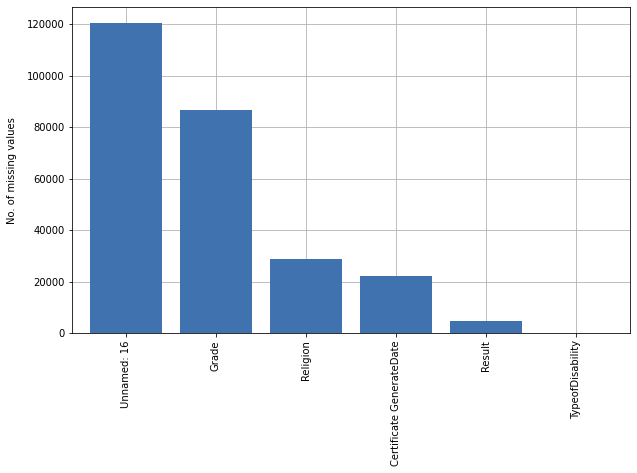

In [ ]:
nans = data.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [ ]:
data = data.drop("Unnamed: 16",axis = 1)

In [ ]:
data = data.drop("Grade",axis = 1)

In [ ]:
data.tail()

,Gender,TypeofDisability,castecategory,Religion,JobRole,SectorName,PartnerName,TC State,TC District,TC Name,TotalCandidatesinBatch,Result,Assesment status,Certified,Certificate GenerateDate,agegroup,EducationLevel,District,No. of colleges,Trade Count,No of ITI,Ph.D,M.Phil,Post Graduate,Under Graduate,PG Diploma,Diploma,Certificate,Integrated,Total Number of Schools,Total Poulation,Sexratio,Decadal Growth Rate,Overall Literacy,Female Literacy,Primary Enrollment,Primary with Upper Primary Enrollment,Primary with Upper Primary sec/higher sec. Enrollment,Upper Primary Only Enrollment,Upper Primary with sec./higher sec. Enrollment,...,"Manufacturing (Metals & Chemicals, and products thereof)",Manufacturing (Leather & products thereof),Mining & Quarrying,Manufacturing (Wood Products),Insurance,"Manufacturing (Paper & Paper products, Publishing, PRIVnting and reproduction of recorded media)",Total population,Population Age(15-21),Population (15-24) Absolute,Population (5-14) Absolute,Population Total male,Population Total female,Population Hindu,Population Muslim,Population christian,Population Sikh,Population Jain,Population other,Total Households,Total Rural Household,Total Urban Household,Number Normal Rural,Number Normal Urban,Institutional Rural,Institutional Urban,Houseless Rural,Houseless Urban,Houseless with Shelter Urban,Houseless without Shelter Urban,Total Population,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher,Not In Labour Force,Employed,Unemployed
120570,Female,None,Gen,NaN,Self Employed Tailor,Apparel,Aaruthal Foundation,Tamil Nadu,Karur,PMKK KARUR,30,Not Appeared,0,No,NaN,36-40,11th-12th std,Karur,31,21,7,144,125,2745,24443,0,3683,0,0,1005,1076588,1015,15.06,75.86,67.05,42418,32225,33449,0,31223,...,97,0,23,0,0,0,1064493,119602,169450,166179,528184,536309,993666,53292,16483,115,7,79,275965,176084,99881,175455,99643,607,211,22,27,21,6,1036340,276930,48715,125738,104427,85576,44102,40232,3.547615,2.584813,0.187259
120571,Male,None,Gen,Islam,Goods & Services Tax (GST) Accounts Assistant,BFSI,DORIC MULTIMEDIA PVT. LTD.,Punjab,Rupnagar,G.I.V.E.S,30,Pass,1,Yes,13:39.0,26-30,Under Graduate/Graduate,Rupnagar,23,55,8,380,0,1476,13567,167,1466,46,2,1098,683349,913,8.67,83.28,77.17,32705,2500,23510,9443,13513,...,4,0,0,0,0,0,684627,97986,137294,118523,357485,327142,304481,14492,2094,361045,653,143,123887,94482,29405,94343,29385,130,20,9,0,0,0,616796,124100,42212,89556,79536,91465,49661,19273,3.001527,1.711048,0.565489
120572,Male,None,Gen,Hinduism,F & B Service: Steward,Tourism & Hospitality,Amro Tourism Academy,Maharashtra,Nashik,AMRO TOURISM ACADEMY,30,Pass,1,Yes,53:50.7,26-30,11th-12th std,Nashik,229,327,51,282,22,23654,230146,124,30080,1382,874,5157,6109052,931,22.33,80.96,73.43,256041,329412,64122,0,260892,...,4000,42,84,40,142,0,6107187,854049,1206528,1229885,3157186,2950001,5237009,693052,23946,8912,38212,1795,1134194,702961,431233,700828,430059,1024,959,1106,213,173,40,5702263,1481778,396350,697132,492501,475624,261919,124511,29.769311,18.647359,0.439637
120573,Female,None,SC,Hinduism,Field Technician - Computing and Peripherals,Electronics and Hardware,THE MANAV KALYAN AVAM VIKAS SANSTHA,Chhattisgarh,Rajnandgaon,LAL BAHADUR SHASTRI TRAINING CENTRE-RAJNANDGAON,30,Pass,1,Yes,05:32.5,19-21,11th-12th std,Rajnandgaon,48,34,15,46,0,2982,23828,186,2585,0,0,3008,1537520,1017,19.82,76.97,66.98,151387,26709,12980,92717,304,...,512,0,31,93,31,0,1537133,217067,300300,331893,762855,774278,1399658,23648,5193,3761,8187,67444,324532,265975,58557,264803,58417,584,113,588,27,14,13,1530419,467554,231029,246655,226671,78558,53939,21192,5

In [ ]:
cols = ["Gender",
"TypeofDisability",
"JobRole",
"SectorName",
"PartnerName",
"Result",
"Certified",
"agegroup",
"EducationLevel",
"District",
"Total Poulation",
"No. of colleges",
"Trade Count",
"No of ITI",
"Ph.D",
"Total Number of Schools",
"Overall Literacy",
"Female Literacy",
"Business Services",
"Total Rural Household",
"Total Urban Household",
"Total Households",
"No of Population Having Highest Education Level of Illitrate",
"No of Population Having Highest Education Level of Llitrate But Below Primary",
"No of Population Having Highest Education Level of Primary",
"No of Population Having Highest Education Level of Middle",
"No of Population Having Highest Education Level of Secondary",
"No of Population Having Highest Education Level of Higher Secondary",
"No of Population Having Highest Education Level of Graduate Or Higher"]

In [ ]:
data = data[cols]

In [ ]:
data.head()

,Gender,TypeofDisability,JobRole,SectorName,PartnerName,Result,Certified,agegroup,EducationLevel,District,Total Poulation,No. of colleges,Trade Count,No of ITI,Ph.D,Total Number of Schools,Overall Literacy,Female Literacy,Business Services,Total Rural Household,Total Urban Household,Total Households,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher
0,Female,None,DTH Set Top Box Installation & Service Technician,Electronics and Hardware,ICA EDU SKILLS PVT LTD,Pass,Yes,22-25,10th std & below,Hassan,1776221,80,204,72,0,3422,75.89,68.30,130,348175,77638,425813,401227,155769,296418,190847,232678,113038,62410
1,Female,None,Retail Sales Associate,Retail,Sun City Of Skill India,Pass,Yes,22-25,10th std & below,Ambala,1136784,63,108,11,326,1143,82.89,76.64,1361,114196,87666,201862,160243,57256,113603,105254,93223,52879,24092
2,Female,None,Retail Sales Associate,Retail,SHRI TECHNOLOGIES,Pass,Yes,22-25,11th-12th std,Vizianagaram,2342868,126,116,31,0,3704,59.49,50.16,209,478978,89774,568752,1031683,217587,249367,207675,139811,85959,63084
3,Female,None,Sewing Machine Operator,Apparel,SHRI TECHNOLOGIES,Pass,Yes,22-25,11th-12th std,Shivamogga,1755512,84,136,42,609,2725,80.50,74.89,370,257688,139979,397667,355222,142850,265371,188432,154600,71815,45850
4,Male,None,Field Technician - Computing and Peripherals,Electronics and Hardware,Dreamz Trust,Pass,Yes,26-30,11th-12th std,Alwar,3671999,201,315,125,10,5502,71.68,56.78,1976,529224,103227,632451,1384905,436897,425308,398494,258384,180145,141335


In [ ]:
data["Result"] = data.groupby("EducationLevel")["Result"].transform(lambda x:x.fillna(x.mode()[0]))

In [ ]:
data["TypeofDisability"] = data["TypeofDisability"].fillna("None")

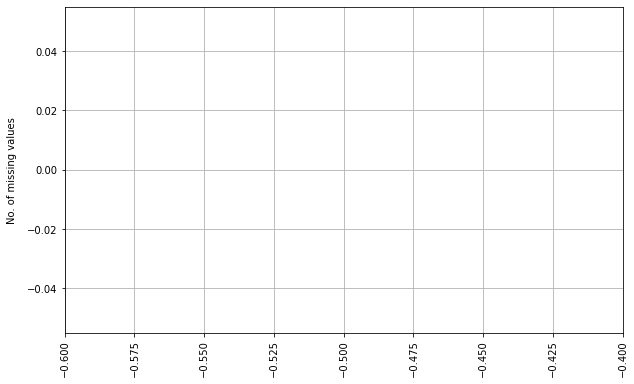

In [ ]:
nans = data.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [ ]:
data.tail()

,Gender,TypeofDisability,JobRole,SectorName,PartnerName,Result,Certified,agegroup,EducationLevel,District,Total Poulation,No. of colleges,Trade Count,No of ITI,Ph.D,Total Number of Schools,Overall Literacy,Female Literacy,Business Services,Total Rural Household,Total Urban Household,Total Households,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher
120570,Female,None,Self Employed Tailor,Apparel,Aaruthal Foundation,Not Appeared,No,36-40,11th-12th std,Karur,1076588,31,21,7,144,1005,75.86,67.05,179,176084,99881,275965,276930,48715,125738,104427,85576,44102,40232
120571,Male,None,Goods & Services Tax (GST) Accounts Assistant,BFSI,DORIC MULTIMEDIA PVT. LTD.,Pass,Yes,26-30,Under Graduate/Graduate,Rupnagar,683349,23,55,8,380,1098,83.28,77.17,14,94482,29405,123887,124100,42212,89556,79536,91465,49661,19273
120572,Male,None,F & B Service: Steward,Tourism & Hospitality,Amro Tourism Academy,Pass,Yes,26-30,11th-12th std,Nashik,6109052,229,327,51,282,5157,80.96,73.43,4861,702961,431233,1134194,1481778,396350,697132,492501,475624,261919,124511
120573,Female,None,Field Technician - Computing and Peripherals,Electronics and Hardware,THE MANAV KALYAN AVAM VIKAS SANSTHA,Pass,Yes,19-21,11th-12th std,Rajnandgaon,1537520,48,34,15,46,3008,76.97,66.98,479,265975,58557,324532,467554,231029,246655,226671,78558,53939,21192
120574,Male,None,Distributor Salesman,Retail,Empower Pragati Vocational & Staffing Pvt Ltd,Fail,No,26-30,10th std & below,Sangrur,1654408,66,95,21,0,1678,68.88,62.86,435,214234,96103,310337,570103,115191,179913,139981,149931,85382,29832


In [ ]:
cols = data.select_dtypes(np.number).columns
data[cols] = StandardScaler().fit_transform(data[cols])

In [ ]:
data.head()

,Gender,TypeofDisability,JobRole,SectorName,PartnerName,Result,Certified,agegroup,EducationLevel,District,Total Poulation,No. of colleges,Trade Count,No of ITI,Ph.D,Total Number of Schools,Overall Literacy,Female Literacy,Business Services,Total Rural Household,Total Urban Household,Total Households,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher
0,Female,None,DTH Set Top Box Installation & Service Technician,Electronics and Hardware,ICA EDU SKILLS PVT LTD,Pass,Yes,22-25,10th std & below,Hassan,-0.534537,-0.241625,0.784162,0.672195,-0.514838,0.424137,0.235999,0.329612,-0.364118,0.027631,-0.408013,-0.242804,-0.704160,-0.510755,-0.056617,-0.322310,0.457158,0.114999,-0.123135
1,Female,None,Retail Sales Associate,Retail,Sun City Of Skill India,Pass,Yes,22-25,10th std & below,Ambala,-0.980342,-0.394501,-0.154782,-0.607064,-0.146007,-1.097754,1.055022,1.105824,-0.239899,-1.060685,-0.354984,-1.006330,-1.173970,-1.065988,-1.003210,-0.845726,-0.656981,-0.682068,-0.585131
2,Female,None,Retail Sales Associate,Retail,SHRI TECHNOLOGIES,Pass,Yes,22-25,11th-12th std,Vizianagaram,-0.139481,0.172041,-0.076537,-0.187635,-0.514838,0.612454,-1.682853,-1.358694,-0.356146,0.636041,-0.343837,0.244524,0.524944,-0.162341,-0.300241,-0.219404,-0.284778,-0.243780,-0.115009
3,Female,None,Sewing Machine Operator,Apparel,SHRI TECHNOLOGIES,Pass,Yes,22-25,11th-12th std,Shivamogga,-0.548975,-0.205654,0.119076,0.043051,0.174175,-0.041312,0.775384,0.942950,-0.339900,-0.393255,-0.078351,-0.338763,-0.793849,-0.583569,-0.217375,-0.337079,-0.166626,-0.431179,-0.322797
4,Male,None,Field Technician - Computing and Peripherals,Electronics and Hardware,Dreamz Trust,Pass,Yes,26-30,11th-12th std,Alwar,0.787166,0.846497,1.869815,1.783683,-0.503524,1.813139,-0.256584,-0.742565,-0.177840,0.869752,-0.272697,0.461696,1.213567,1.073718,0.610759,0.947487,0.662529,1.004122,0.828454


In [ ]:
#data = pd.get_dummies(data)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

In [ ]:
data['Gender'].unique()

array([0, 1])

In [ ]:
data.head()

,Gender,TypeofDisability,JobRole,SectorName,PartnerName,Result,Certified,agegroup,EducationLevel,District,Total Poulation,No. of colleges,Trade Count,No of ITI,Ph.D,Total Number of Schools,Overall Literacy,Female Literacy,Business Services,Total Rural Household,Total Urban Household,Total Households,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher
0,0,10,59,9,697,2,1,2,0,172,253,78,164,65,0,376,272,295,81,327,304,312,187,218,306,281,394,360,333
1,0,10,175,28,1864,2,1,2,0,12,134,62,103,10,124,81,367,381,281,59,327,109,49,51,87,139,192,180,145
2,0,10,175,28,1508,2,1,2,1,467,320,113,110,30,0,389,35,63,115,390,331,370,393,316,254,295,273,304,337
3,0,10,187,2,1508,2,1,2,1,405,248,82,126,41,151,304,335,363,159,226,392,291,159,195,273,274,300,248,270
4,1,10,88,9,444,2,1,3,1,11,420,147,187,80,9,445,201,135,307,408,361,394,441,428,393,433,413,438,448


In [ ]:
data.columns

Index(['Gender', 'TypeofDisability', 'JobRole', 'SectorName', 'PartnerName',
       'Result', 'Certified', 'agegroup', 'EducationLevel', 'District',
       'Total Poulation', 'No. of colleges', 'Trade Count', 'No of ITI',
       'Ph.D', 'Total Number of Schools', 'Overall Literacy',
       'Female Literacy', 'Business Services', 'Total Rural Household',
       'Total Urban Household', 'Total Households',
       'No of Population Having Highest Education Level of Illitrate',
       'No of Population Having Highest Education Level of Llitrate But Below Primary',
       'No of Population Having Highest Education Level of Primary',
       'No of Population Having Highest Education Level of Middle',
       'No of Population Having Highest Education Level of Secondary',
       'No of Population Having Highest Education Level of Higher Secondary',
       'No of Population Having Highest Education Level of Graduate Or Higher'],
      dtype='object')

In [ ]:
data.corr()

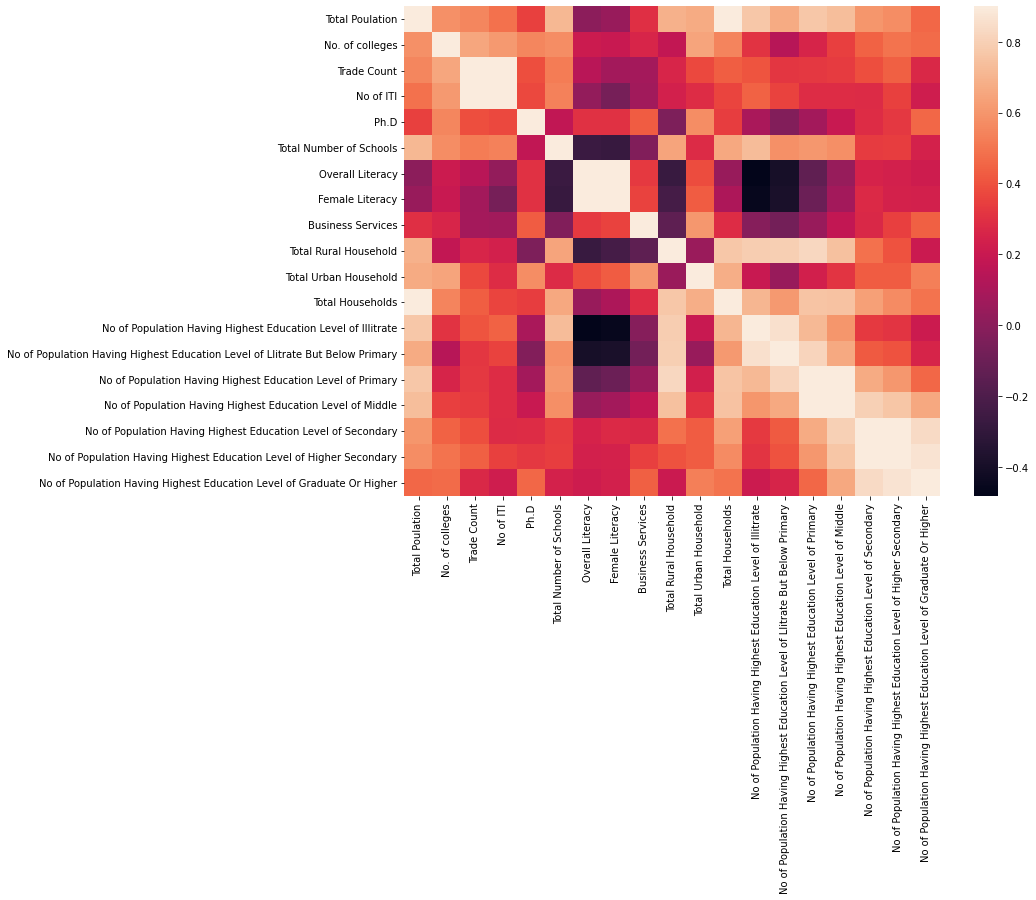

In [ ]:
cor = data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cor, vmax=0.9)

In [ ]:
X_train = data.loc[train.index]
X_test = data.loc[test.index]

In [ ]:
y_train = train_data["placed"]
y_test = test_data["placed"]

In [ ]:
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))

96460 24115
96460 24115


In [ ]:
model = LogisticRegression(random_state=0,max_iter=50)

In [ ]:
#model = LogisticRegression(C=109.85411419875572,
#         penalty='l2', random_state=0,
#          solver='newton-cg')

In [ ]:
#grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#   'C' : np.logspace(-4, 4, 20),
#    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#    'max_iter' : [100, 1000,2500, 5000]
#}

In [ ]:
#search = RandomizedSearchCV(LogisticRegression(),param_distributions=grid,n_jobs=-1)
#searchbest = search.fit(X_train,y_train)
#model = searchbest.best_estimator_

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=50, random_state=0)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
score = model.score(X_train,y_train)
print("{:.3f}%".format(score*100))

55.454%


In [ ]:
predictions = ["Yes" if i==1 else "No" for i in predictions]

In [ ]:
my_prediction = pd.DataFrame({"ID": [i+1 for i in range(len(test_data.index))], "placed": predictions})

In [ ]:
my_prediction.to_csv("my_prediction.csv", index=False)